In [ ]:
!wget https://github.com/RavindraKupatkar/Pulmonary_Fibrosis_detection/archive/refs/heads/master.zip

--2023-02-28 13:46:25--  https://github.com/RavindraKupatkar/Pulmonary_Fibrosis_detection/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/RavindraKupatkar/Pulmonary_Fibrosis_detection/zip/refs/heads/master [following]
--2023-02-28 13:46:26--  https://codeload.github.com/RavindraKupatkar/Pulmonary_Fibrosis_detection/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.3’

master.zip.3            [        <=>         ] 458.58M  17.2MB/s    in 30s     

2023-02-28 13:46:56 (15.4 MB/s) - ‘master.zip.3’ saved [480854081]



In [ ]:
!unzip master.zip

Archive:  master.zip
f764dad4a83fd25d61a42af94faaf23bf3e40b44
replace Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(1).png  
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(10).png  
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(100).png  
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(101).png  
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(11).png  
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(12).png  
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(13).png  
 extracting: Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(14).png  
 ext

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #For ploting
import torch    #Pytorch
import os

In [ ]:
# Look into the data directory
data_dir = '/content/Pulmonary_Fibrosis_detection-master/Fibrosis-504'
#print(os.listdir(data_dir))

#Training data directory
train_dir = (data_dir + '/Train')
print('Train Classes:')
print(os.listdir(train_dir))

#Test data directory
test_dir = (data_dir + '/Test')
print('Test Classes:')
print(os.listdir(test_dir))

#pred_dir = (data_dir + '/seg_pred/seg_pred')

Train Classes:
['Fibrosis', 'Normal']
Test Classes:
['Fibrosis', 'Normal']


In [ ]:
import torchvision.transforms as tt #To apply transformations to the dataset, augmenting it and transforming it to a tensor.
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder #Load dataset

In [ ]:
#Transformations aplied to test DS.
train_tf = tt.Compose([         
    tt.ColorJitter(brightness=0.2),
    tt.Resize(size=(150,150)),
    tt.RandomHorizontalFlip(),
    tt.RandomRotation(5),
    tt.ToTensor(),            
])

#Transformations aplied to test DS.
test_tf= tt.Compose([   
    tt.Resize(size=(150,150)),
    tt.ToTensor(),
])

In [ ]:
train_ds = ImageFolder(train_dir,train_tf)
test_ds = ImageFolder(test_dir,test_tf)

len(train_ds), len(test_ds)

(806, 202)

In [ ]:
from PIL import Image

image_path = '/content/Pulmonary_Fibrosis_detection-master/Fibrosis-504/Test/Fibrosis/Fibrosis_test(1).png'
img = Image.open(image_path)
img = test_tf(img)
img = np.array(img).reshape(150,150)
np.array([img,img,img]).shape

(3, 150, 150)

In [ ]:
type (test_ds[1][0])

torch.Tensor

In [ ]:
img,label=train_ds[1]
img.shape

torch.Size([3, 150, 150])

In [ ]:
def ds_info(dataset):
    dataset_size=len(dataset)
    classes = dataset.classes
    num_classes = len(classes)
    
    #Initialize list
    count = []     
    for x in range(num_classes):
        count.append(0)
        
    #Count every label
    for x in range(dataset_size):
        count[dataset[x][1]]+=1
        
    print('Size of the dataset:' + str(dataset_size))
    print('Number of classes:' + str(num_classes))    
    print('Samples for every class:')
    
    #Print the count
    for x in range(num_classes):
        print(classes[x] + " : " + str(count[x]))
    

In [ ]:
print('Training dataset information:')
ds_info(train_ds)

Training dataset information:
Size of the dataset:806
Number of classes:2
Samples for every class:
Fibrosis : 403
Normal : 403


In [ ]:
print('Test dataset information:')
ds_info(test_ds)

Test dataset information:
Size of the dataset:202
Number of classes:2
Samples for every class:
Fibrosis : 101
Normal : 101


In [ ]:
batch_size = 32

train_dl = DataLoader(
    train_ds,
    batch_size=batch_size,
    num_workers=3,
    shuffle=True,
    pin_memory=True
)

test_dl = DataLoader(
    test_ds,
    batch_size=batch_size,
    num_workers=3,
    shuffle=False,
    pin_memory=True
)

In [ ]:
from torchvision.utils import make_grid

In [ ]:
# def show_batch(dl):
#     for images, labels in dl:
#         fig, ax = plt.subplots(figsize=(12, 12))
#         ax.set_xticks([]); ax.set_yticks([])
#         ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
#         break

In [ ]:
# %matplotlib inline
# show_batch(train_dl)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device() #Getting the device
device

train_dl = DeviceDataLoader(train_dl, device) #Transfering train data to GPU
test_dl = DeviceDataLoader(test_dl, device)   #Transfering test data to GPU

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            (epoch+1), result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False,p_size=2):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(p_size))
    return nn.Sequential(*layers)


In [ ]:
import torch
import torchvision.models as models

class googlenet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.googlenet(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 2)
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
def plot_scores(history):
    scores = [x['val_acc'] for x in history]
    plt.plot(scores, '-x')
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
def show_sample(img, target):
    plt.imshow(img.permute(1, 2, 0))
    print('Labels:', target)
    
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    show_sample(img,test_ds.classes[preds[0].item()])
    return yb

ResNet34

In [ ]:
model = to_device(googlenet(), device)
model

googlenet(
  (network): GoogLeNet(
    (conv1): BasicConv2d(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): BasicConv2d(
      (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv3): BasicConv2d(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (inception3a): Inception(
      (branch1): BasicConv2d(
        (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn):

In [ ]:
history = [evaluate(model, test_dl)]
history

[{'val_loss': 0.7392796277999878, 'val_acc': 0.4464285671710968}]

In [ ]:
# epochs = 5
epochs2 = 7
max_lr2 = 0.00005
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
model.freeze()

In [ ]:
%%time
history = fit_one_cycle(epochs2, max_lr2, model, train_dl, test_dl, 
                         grad_clip=grad_clip, 
                         weight_decay=weight_decay, 
                         opt_func=opt_func)

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [1], last_lr: 0.00002, train_loss: 0.6788, val_loss: 0.6575, val_acc: 0.4732


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [2], last_lr: 0.00005, train_loss: 0.5372, val_loss: 0.4742, val_acc: 0.9375


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [3], last_lr: 0.00005, train_loss: 0.4027, val_loss: 0.3915, val_acc: 0.9554


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [4], last_lr: 0.00003, train_loss: 0.3564, val_loss: 0.3800, val_acc: 0.9554


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [5], last_lr: 0.00002, train_loss: 0.3435, val_loss: 0.3881, val_acc: 0.9196


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [6], last_lr: 0.00000, train_loss: 0.3379, val_loss: 0.3801, val_acc: 0.9375


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [7], last_lr: 0.00000, train_loss: 0.3388, val_loss: 0.3768, val_acc: 0.9509
CPU times: user 15.5 s, sys: 2.75 s, total: 18.3 s
Wall time: 4min 11s


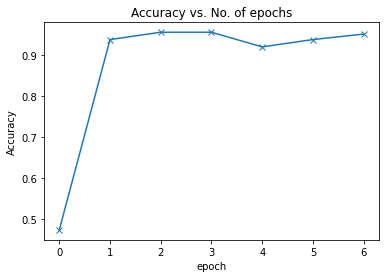

In [ ]:
plot_scores(history)

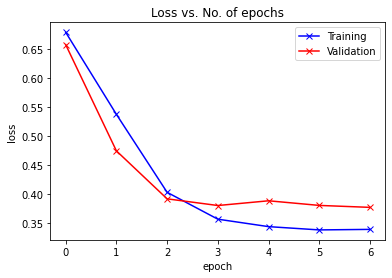

In [ ]:
plot_losses(history)

Labels: Fibrosis


tensor([[0.9796, 0.0296]], device='cuda:0', grad_fn=<SigmoidBackward0>)

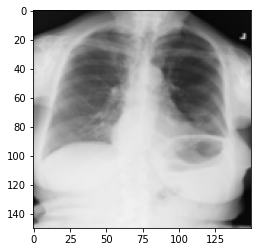

In [ ]:
predict_image(test_ds[65][0],model)
# model(test_ds[34][0])

In [ ]:
torch.save(model, 'model.pt')

In [ ]:
import joblib
joblib.dump(model,'model3.pkl')

['model3.pkl']

In [ ]:
m22 = joblib.load('model3.pkl')

Labels: Fibrosis


tensor([[0.9330, 0.0538]], device='cuda:0', grad_fn=<SigmoidBackward0>)

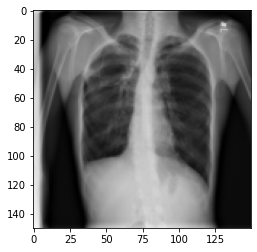

In [ ]:
predict_image(test_ds[34][0],m22)

Labels: Fibrosis


tensor([[0.9695, 0.0299]], device='cuda:0', grad_fn=<SigmoidBackward0>)

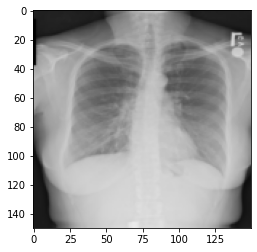

In [ ]:
predict_image(test_ds[99][0],model)

In [ ]:
!zip -r detector.zip model.pt

updating: model.pt (deflated 7%)
